In [1]:
# Import
import json
import pandas as pd

In [2]:
# Open data
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

print(df.head())



         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [3]:
df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

In [4]:
df.describe()

,firstKeyword,secondKeyword,thirdKeyword,fourthKeyword,thematicFocusCategory,cleanFocusCategory
count,168465,164878,159638,145449,79913,79913
unique,32719,40366,44722,44041,46,46
top,Germany,Germany,Germany,Germany,{'name': 'Politics'},Politics
freq,4010,2107,1584,1291,24923,24923


In [5]:
df_clean = df.copy()
df_clean = df_clean.dropna()
df_clean.describe()

,firstKeyword,secondKeyword,thirdKeyword,fourthKeyword,thematicFocusCategory,cleanFocusCategory
count,68032,68032,68032,68032,68032,68032
unique,13389,17743,19796,20652,46,46
top,Germany,Germany,Germany,Germany,{'name': 'Politics'},Politics
freq,2422,1060,821,743,21983,21983


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_clean['firstKeyword']).toarray()
labels = df_clean['cleanFocusCategory']
features.shape

AttributeError: 'numpy.ndarray' object has no attribute 'head'

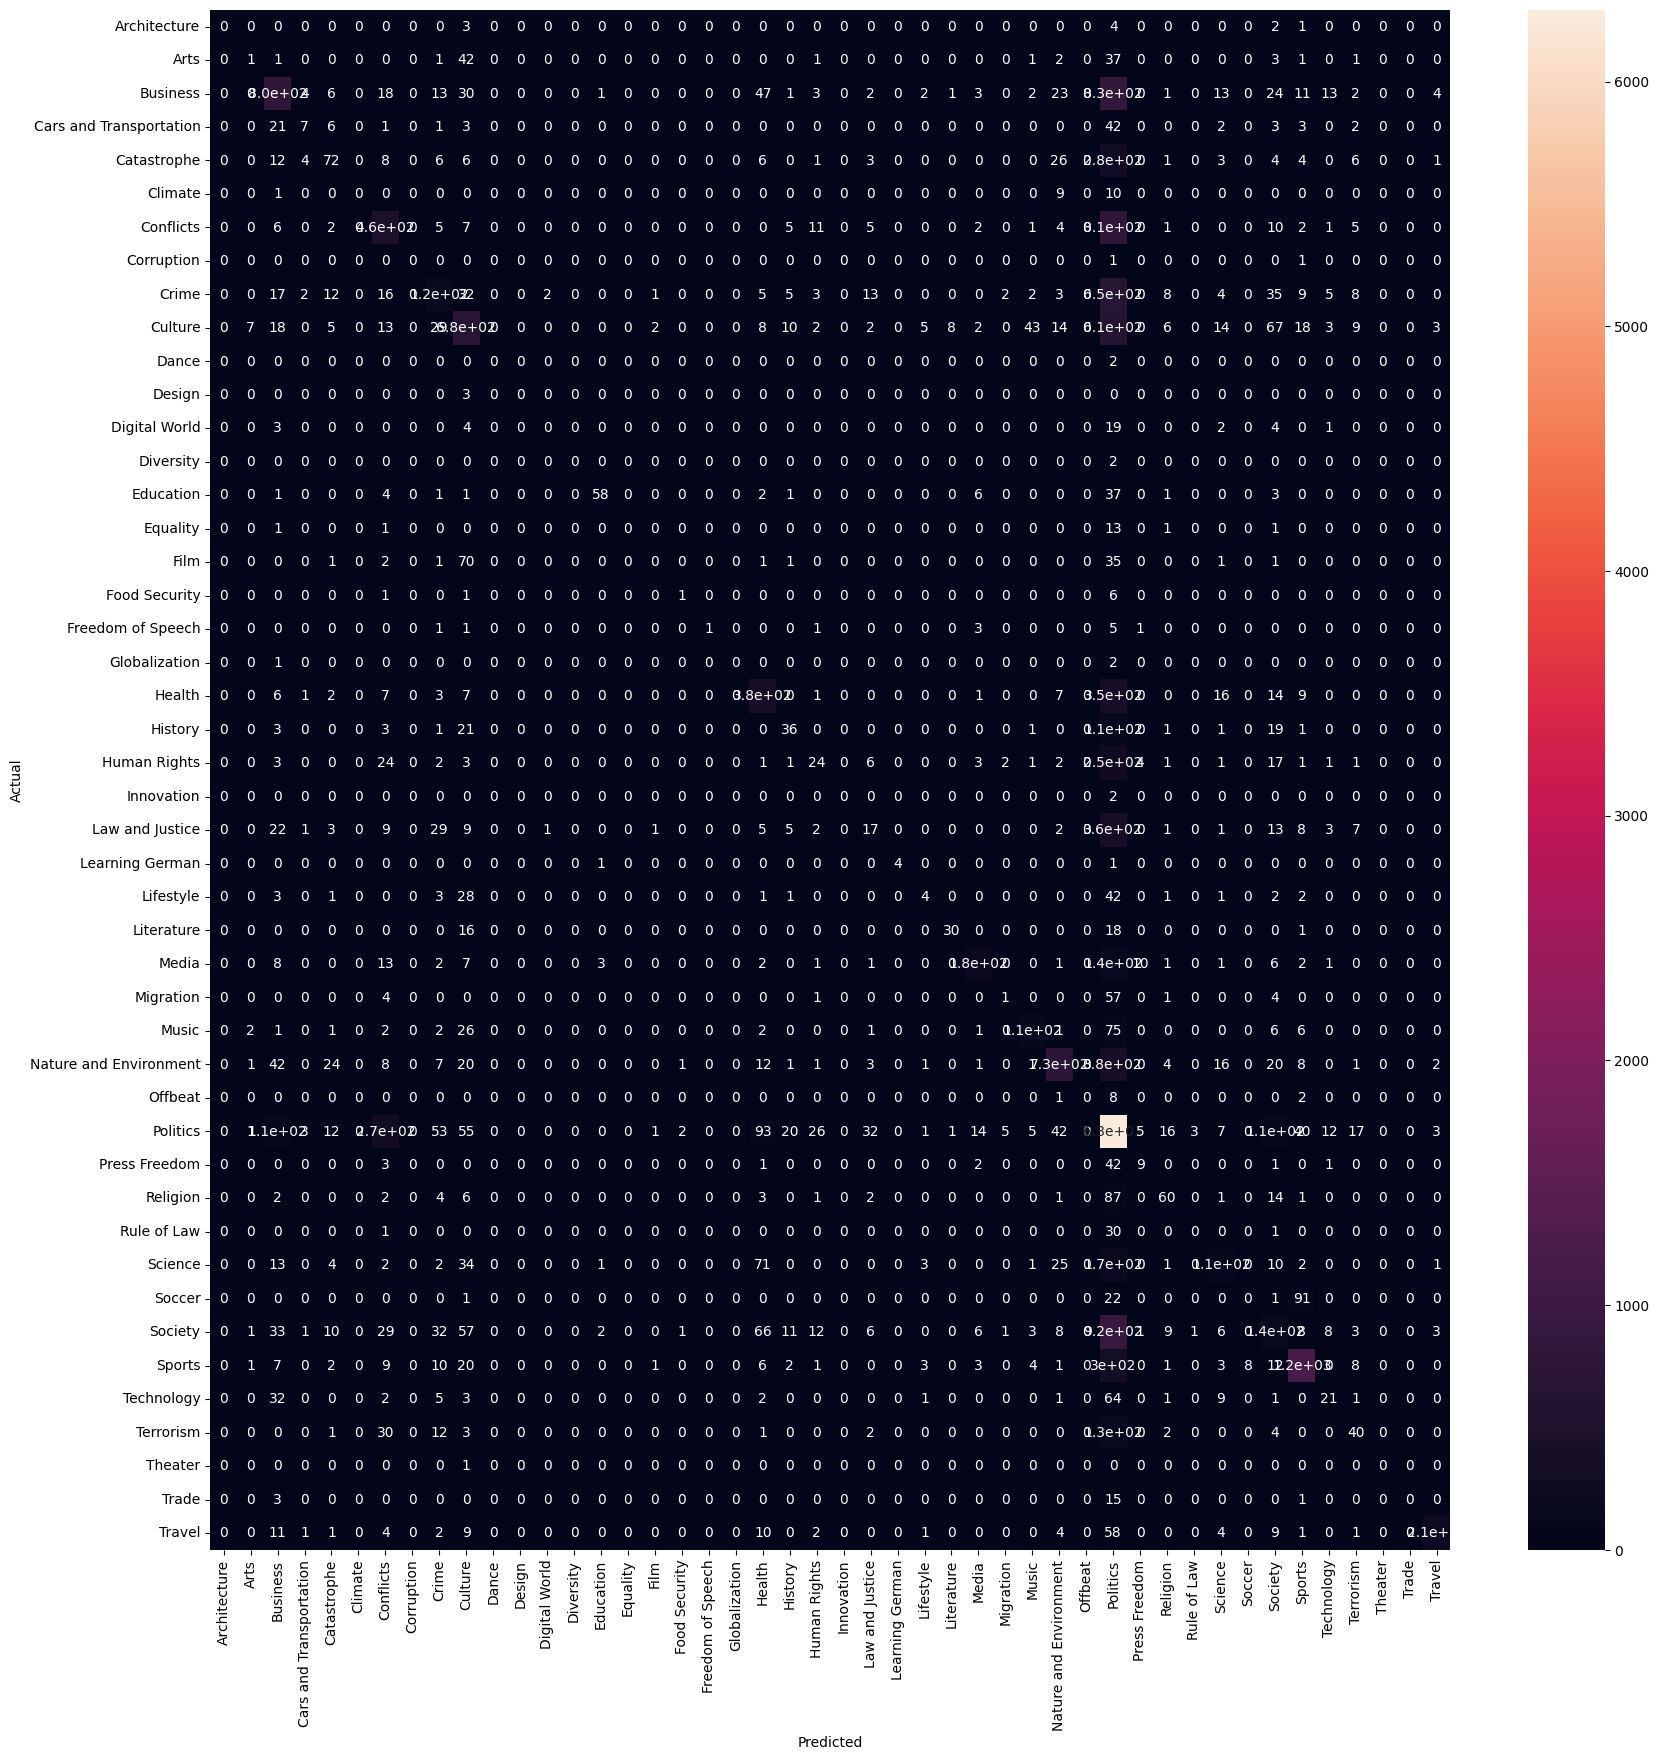

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5253663533918311

In [87]:
# Playground Magda